In [ ]:
# Importa os modulos, funcoes e classes necessarias para o codigo
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import preprocessing


import numpy as np
import gzip

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report


# Leitura e recuperação dos dados de treino e teste

In [ ]:
# Download dos arquivos com os dados de treino e teste
# Referencia: http://yann.lecun.com/exdb/mnist/

!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

--2022-11-28 03:50:16--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  28.9MB/s    in 0.3s    

2022-11-28 03:50:16 (28.9 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2022-11-28 03:50:16--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===========

In [ ]:
# Define a quantidade de exemplos nos arquivos de treino e teste e a quantidade de pixels nas imagens
tamanho_treino = 60000
tamanho_teste = 10000
tamanho_imgs = 28 * 28

In [ ]:
# LE E RECUPERA OS DADOS DO TREINO

# Realiza a leitura dos atributos de entrada dos exemplos de treino e armazena na variavel dados_treino
f = gzip.open('train-images-idx3-ubyte.gz','r')
f.read(16)
buf = f.read(tamanho_imgs * tamanho_treino)
dados_treino = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
dados_treino = dados_treino.reshape(tamanho_treino, tamanho_imgs)

# Realiza a leitura das classes dos exemplos de treino e armazena na variavel classes_treino
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(tamanho_treino)
classes_treino = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)

In [ ]:
# LE E RECUPERA OS DADOS DO TESTE

# Realiza a leitura dos atributos de entrada dos exemplos de teste e armazena na variavel dados_teste
f = gzip.open('t10k-images-idx3-ubyte.gz','r')
f.read(16)
buf = f.read(tamanho_imgs * tamanho_teste)
dados_teste = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
dados_teste = dados_teste.reshape(tamanho_teste, tamanho_imgs)

# Realiza a leitura das classes dos exemplos de teste e armazena na variavel classes_teste
f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(tamanho_teste)
classes_teste = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)

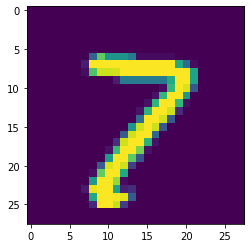

Classe verdadeira: 7


In [ ]:
# Exibe uma imagem aleatoria do conjunto de treino e sua classe verdadeira
indice_aleatorio = np.random.randint(tamanho_treino)
image = np.asarray(dados_treino[indice_aleatorio].reshape(28, 28)).squeeze()
plt.imshow(image)
plt.show()
print ('Classe verdadeira:', classes_treino[indice_aleatorio])

# Normalização dos valores dos atributos de entrada

In [ ]:
# Instancia o metodo de normalização dos valores
scaler1 = MinMaxScaler()


In [ ]:
# fit nos exemplos de treino
scaler1 = scaler1.fit(dados_treino)

In [ ]:
#transform nos exemplos de treino
dados_treino_norm = scaler1.fit_transform(dados_treino) #eu só não sobreescrevi a variavel por convenção propria

In [ ]:
# transform nos exemplos de teste
dados_teste_norm = scaler1.fit_transform(dados_teste) #eu só não sobreescrevi a variavel por convenção propria

# Classificador k-Nearest Neighbors (kNN)

In [ ]:
# Treinar e testar um classificador kNN
classificador_knn = KNeighborsClassifier(n_neighbors=7)

classificador_knn.fit(dados_treino_norm, classes_treino)

saida_predita_knn = classificador_knn.predict(dados_teste_norm)

print ('Resultados kNN:\n', classification_report(classes_teste, saida_predita_knn))

Resultados kNN:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



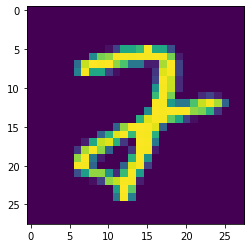

Classe verdadeira: 2
Classe predita: 7


In [ ]:
# Exibe uma imagem aleatoria do conjunto de teste em que o classificador errou

indice_erro = np.random.choice(np.where(saida_predita_knn!=classes_teste)[0])

image = np.asarray(dados_teste[indice_erro].reshape(28, 28)).squeeze()
plt.imshow(image)
plt.show()
print ('Classe verdadeira:', classes_teste[indice_erro])
print ('Classe predita:', saida_predita_knn[indice_erro])

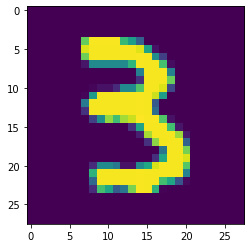

Classe verdadeira: 3
Classe predita: 3


In [ ]:
# Exibe uma imagem aleatoria do conjunto de teste em que o classificador acertou

indice_acerto = np.random.choice(np.where(saida_predita_knn==classes_teste)[0])

image = np.asarray(dados_teste[indice_acerto].reshape(28, 28)).squeeze()
plt.imshow(image)
plt.show()
print ('Classe verdadeira:', classes_teste[indice_acerto])
print ('Classe predita:', saida_predita_knn[indice_acerto])

# Classificador Multilayer Perceptron

In [ ]:
# definição dos atributos usados no modelo
# para manter um padão mais semelhante usado pelo professor nos exemplos
atributos_entrada_treino = dados_treino_norm
classes_treinoCMP = classes_treino

atributos_entrada_teste = dados_teste_norm
classes_testeCMP = classes_teste

In [ ]:
# Treinar um classificador Multilayer Perceptron

classificador_mlp = MLPClassifier(hidden_layer_sizes=(250, 100, 50), activation='relu', max_iter=100)
#os valores que eu defini para as camadas e numero de interações são um pouco altos, no Google coolab demora uns 4 min para rodar essa parte

classificador_mlp.fit(atributos_entrada_treino, classes_treinoCMP)

saida_predita_treino_mlp = classificador_mlp.predict(atributos_entrada_treino)
print ('Resultados Treino MLP:\n', classification_report(classes_treino, saida_predita_treino_mlp))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Resultados Treino MLP:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      0.99      1.00      6131
           4       0.99      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      0.99      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [ ]:
# Testar o classificador Multilayer Perceptron treinado
saida_predita_teste_mlp = classificador_mlp.predict(atributos_entrada_teste)

print ('Resultados teste MLP:\n', classification_report(classes_teste, saida_predita_teste_mlp))

Resultados teste MLP:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.96      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Classificador Árvore de Decisão

In [ ]:
# Treinar um classificador de Arvore de Decisao

classificador_dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=100, min_samples_leaf=1)

classificador_dt.fit(atributos_entrada_treino, classes_treino)

saida_predita_treino_dt = classificador_dt.predict(atributos_entrada_treino)


print ('Resultados Treino MLP:\n', classification_report(classes_treino, saida_predita_treino_dt))

Resultados Treino MLP:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [ ]:
# Testar o classificador de Arvore de Decisao treinado
saida_predita_teste_dt = classificador_dt.predict(atributos_entrada_teste)
print ('Resultados teste MLP:\n', classification_report(classes_teste, saida_predita_teste_dt))

Resultados teste MLP:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.96      0.97      0.97      1135
           2       0.88      0.88      0.88      1032
           3       0.86      0.86      0.86      1010
           4       0.86      0.88      0.87       982
           5       0.83      0.83      0.83       892
           6       0.91      0.90      0.90       958
           7       0.91      0.90      0.91      1028
           8       0.85      0.84      0.84       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.89     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.89      0.89      0.89     10000

